In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyecharts
from pyecharts import Scatter,Bar,Line



%matplotlib inline


ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [3]:
path =os.getcwd()

In [4]:
pd.set_option('max_row', 1000)

In [5]:
df =pd.read_csv(path + '/Kickstarter/cleaned_kick_data01.csv')

In [6]:
df.shape

(85233, 17)

In [7]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,film,GB,2017-01-11,GBP,2017-02-15,1.261110,40000.0,"London, UK",0.0,False,failed,35,11,Europe,London,UK
1,12,crafts,CA,2016-02-28,CAD,2016-03-29,0.748587,5000.0,"London, Canada",357.0,False,failed,30,28,America,London,Canada
2,1,games,AU,2016-02-13,AUD,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,False,failed,35,13,Oceania,Perth,AU
3,3,fashion,US,2015-05-25,USD,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,False,failed,37,25,America,Austin,TX
4,2,film,US,2018-05-18,USD,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,False,failed,30,18,America,Los Angeles,CA


In [8]:
df.status.value_counts()

successful    42927
failed        42306
Name: status, dtype: int64

In [9]:
#分别计算成功和失败项目的总目标
df.groupby('status').goal.sum().astype(int)

status
failed        4596636966
successful     537985777
Name: goal, dtype: int64

In [9]:
df.goal.sum()

5134622743.0

In [10]:
df.groupby('status').pledged.sum().astype(int)

status
failed          72058145
successful    1148779075
Name: pledged, dtype: int64

In [11]:
df.pledged.sum()

1220837220.77

In [12]:
#分别计算成功和失败项目的期限
df.groupby('status').duration.sum()

status
failed        2598508
successful    2917215
Name: duration, dtype: int64

In [13]:
df.duration.sum()

5515723

In [14]:
df.groupby('status').backers_count.sum()

status
failed         505887
successful    9604078
Name: backers_count, dtype: int64

In [15]:
df.backers_count.sum()

10109965

In [16]:
df.country.value_counts()

US    57503
GB     9927
CA     4353
AU     2294
DE     1771
FR     1354
IT     1189
MX     1030
ES      952
NL      886
SE      782
DK      504
NZ      430
HK      337
IE      333
CH      328
BE      314
NO      289
SG      277
AT      245
JP      107
LU       28
Name: country, dtype: int64

In [52]:
#计算美国各个州的项目发起数
df[df['country'].isin(['US'])].state.value_counts()

CA                                  9982
NY                                  5920
TX                                  3418
FL                                  2943
IL                                  2129
PA                                  1840
WA                                  1822
GA                                  1574
OH                                  1565
MA                                  1504
NC                                  1372
OR                                  1369
CO                                  1332
MI                                  1297
VA                                  1188
AZ                                  1086
UT                                  1017
MN                                   994
NJ                                   948
TN                                   945
NV                                   888
MO                                   846
MD                                   834
WI                                   729
IN              

In [17]:
#计算每个国家的属于不同状态的项目数
df.groupby('status').country.value_counts()

status      country
failed      US         28353
            GB          4234
            CA          2112
            AU          1223
            DE          1053
            IT           877
            FR           697
            ES           591
            MX           590
            NL           525
            SE           407
            DK           247
            NZ           229
            BE           196
            CH           187
            IE           183
            NO           165
            AT           156
            SG           116
            HK           112
            JP            44
            LU             9
successful  US         29150
            GB          5693
            CA          2241
            AU          1071
            DE           718
            FR           657
            MX           440
            SE           375
            ES           361
            NL           361
            IT           312
            DK         

In [16]:
#计算不同类别的状态项目数
df.groupby('status').category.value_counts().sort_index()

status      category   
failed      art            2616
            comics          999
            crafts         2295
            dance           413
            design         1318
            fashion        2413
            film           6004
            food           6375
            games          2610
            journalism     1742
            music          3089
            photography    2140
            publishing     2665
            technology     6453
            theater        1174
successful  art            4316
            comics         3846
            crafts         2314
            dance          1344
            design          764
            fashion        3858
            film           4401
            food           2341
            games          2526
            journalism     1060
            music          3681
            photography    1586
            publishing     5247
            technology     3917
            theater        1726
Name: category, 

In [17]:
rng = np.random.RandomState(0)
sizes  = 1000* rng.rand(100)

In [18]:
df.groupby(['status','category']).goal.mean().sort_index()

status      category   
failed      art             41289.075306
            comics          23804.380380
            crafts          17384.216558
            dance           20571.532688
            design         146916.534901
            fashion         33390.158309
            film           324814.559960
            food            82460.563765
            games           93823.619540
            journalism     106531.196326
            music           27204.523147
            photography     21883.479907
            publishing      20945.857411
            technology     143863.811406
            theater        102960.729983
successful  art              5696.923772
            comics           5788.570203
            crafts           9033.897580
            dance            6333.409970
            design           9997.526178
            fashion         11013.475376
            film            16485.335151
            food            15290.054677
            games           17857

In [23]:
v = [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13,14, 15]
v1 =['art', 'comics', 'crafts', 'dance', 'design', 'fashion', 'film', 'food', 'games', 'journalism', 'music','photography', 'publishing', 'technology', 'theater']
avg_goal_successful =(df.groupby(['status', 'category']).goal.mean().sort_index()['successful'].astype(int)/1000)
avg_goal_failed=(df.groupby(['status', 'category']).goal.mean().sort_index()['failed'].astype(int)/1000)
scatter =Scatter('status/category',width =900, height =500, title_pos= 'top')
scatter.add('successful', v1, avg_goal_successful ,xaxis_type="category", is_xaxis_boundarygap =False,xaxis_interval =0, 
            xaxis_rotate =45, xaxis_name ='Category',xaxis_name_gap =35, yaxis_name='Avg_goal(K)', yaxis_name_gap =35, 
            label_color =['#A020F0'], symbol_size =13, label_pos ='inside')
scatter.add('failed', v1, avg_goal_failed , xaxis_type="category",is_xaxis_boundarygap =False, xaxis_interval =0, 
            xaxis_rotate=45, xaxis_name ='Category', xaxis_name_gap =35,yaxis_name='Avg_goal(K)', yaxis_name_gap =40, symbol_size =25, alpha =0.8
            ,label_color =['#CD3333'],label_pos ='inside')
scatter.use_theme('vintage')
# scatter.render(path +'/scatter.html')


In [35]:
df['status_'] = df.status.map(lambda x:1 if x=='successful'else 0)

In [54]:
#计算美国各个state的成功率
df_US =df.loc[df['country'] == 'US']
df_US.groupby('state').status_.mean().sort_index()

state
AK                                  0.506098
AL                                  0.424020
AR                                  0.346570
AU                                  0.600000
AZ                                  0.421731
Afghanistan                         1.000000
Algeria                             0.000000
Antarctica                          0.875000
Antigua and Barbuda                 0.000000
Argentina                           0.266667
Armenia                             0.000000
Austria                             0.833333
Bahamas                             0.200000
Bangladesh                          1.000000
Barbados                            1.000000
Belarus                             0.250000
Belgium                             1.000000
Belize                              0.428571
Bhutan                              1.000000
Bolivia                             0.166667
Bosnia and Herzegovina              0.666667
Brazil                              0.263158
Bulg

In [38]:
df.groupby(df['country'].isin(['US'])).status_.mean()

country
False    0.496827
True     0.506930
Name: status_, dtype: float64

In [26]:
success_rate =df.groupby('category').status_.mean().sort_index()
bar =Bar('category VS success rate', title_pos ='center', )
bar.add( '', v1, success_rate, xaxis_type="category",xaxis_interval =0, 
            xaxis_rotate =45, xaxis_name ='Category',xaxis_name_gap =35,
            yaxis_name='Success_Rate', yaxis_name_gap =35,
#             is_label_show =True
#             mark_point=['max', 'min']
       
)

In [38]:
bar =Bar('ACC of each Model', title_pos ='center',title_top =20,title_text_size=20)
model =['MLP', 'DT', 'RF', 'LR', 'SVM', 'KNN']
value =[0.973, 0.900, 0.939, 0.940, 0.938, 0.930]
# yaxis=[0.850,0.875,0.900,0.925, 0.950]
bar.add('',model,y_axis=value,xaxis_type="category",xaxis_interval =0,yaxis_min =0.89,
            xaxis_rotate =0, xaxis_name ='Algorithm',xaxis_name_gap =35,
            yaxis_name='Auc', yaxis_name_gap =35, label_color =['#63B8FF'],
            is_label_show=True)

In [114]:
project_amount = df['category'].value_counts()
pledged_amount  =df.groupby('category').pledged.sum().astype(int)
pledged_amount
bar =Bar('number of each category', title_pos='center', title_top =10,
         title_text_size =23, height =500, width = 900)
bar.add('', v1, project_amount,xaxis_interval =0, xaxis_type ='category',
            xaxis_rotate =45, xaxis_name ='Category',xaxis_name_gap =35,
            yaxis_name='Number_of_project', yaxis_name_gap =45,
            is_label_show =True,
            label_color =['#8470FF'],
#             is_random =True
            )
# line  =Line('amount_pledged & amount_each_category')
# line.add('', v1, pledged_amount)
bar.use_theme('infographic')

In [78]:
success_counts_state =df[df['status'] == 'successful']['state'].value_counts()[:30]

In [79]:
success_counts_state

CA         5654
UK         5570
NY         3671
Canada     2188
TX         1517
IL         1169
WA         1092
AU         1026
FL          989
PA          979
MA          935
OR          812
Germany     685
OH          678
CO          660
France      658
MI          611
NC          601
GA          588
MN          581
VA          556
UT          543
Mexico      483
NV          472
AZ          463
TN          448
NJ          413
MD          405
MO          384
Sweden      382
Name: state, dtype: int64

In [97]:
v2 =['CA', 'UK', 'NY', 'Canada', 'TX', 'IL', 'WA', 'AU', 'FL', 'PA', 'MA', 'OR', 'Germany', 'OH', 'CO', 'France',
      'MI', 'NC', 'GA', 'MN', 'VA', 'UT', 'Mexico', 'NV', 'AZ', 'TN', "NJ", 'MD', 'MO', 'Sweden']
bar =Bar('success_amount/state', title_pos ='center',width = 900 ,height =450, title_top =25, title_text_size =25)
bar.add( '', v2, success_counts_state, xaxis_type="category",xaxis_interval =0, 
            xaxis_rotate =45, xaxis_name ='State',xaxis_name_gap =40,
            yaxis_name='Success_amount', yaxis_name_gap =45,
            is_label_show= True       
)
bar.use_theme('infographic')

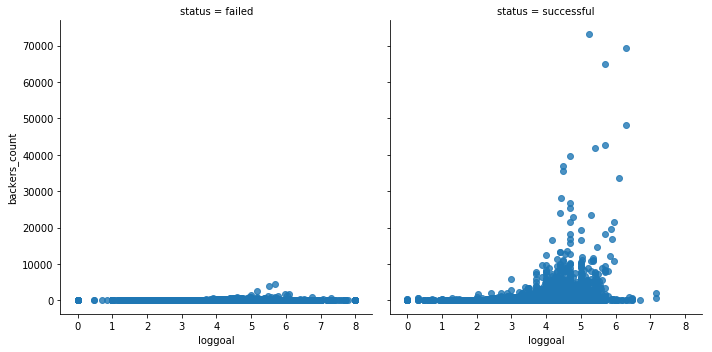

In [100]:
df['loggoal'] = np.log10(df['goal'])
sns.lmplot(x = 'loggoal', y = 'backers_count', col ='status', data = df, fit_reg = False)

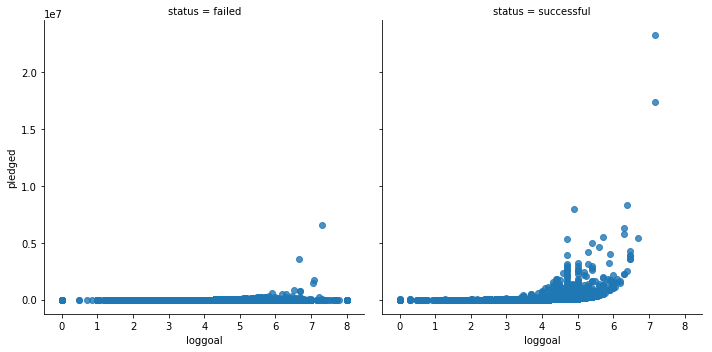

In [101]:

sns.lmplot(x = 'loggoal', y = 'pledged', col ='status', data = df, fit_reg = False)

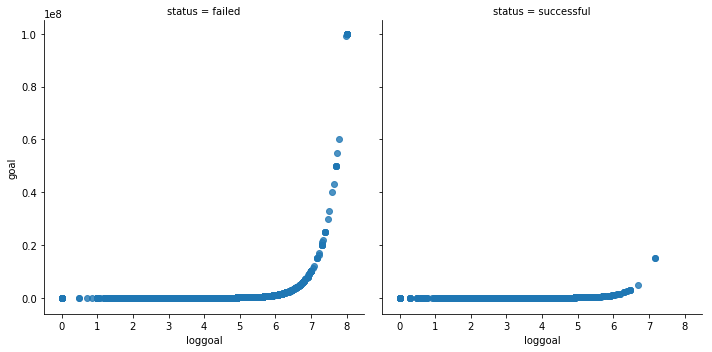

In [103]:
sns.lmplot(x = 'loggoal', y = 'goal', col ='status', data = df, fit_reg = False)

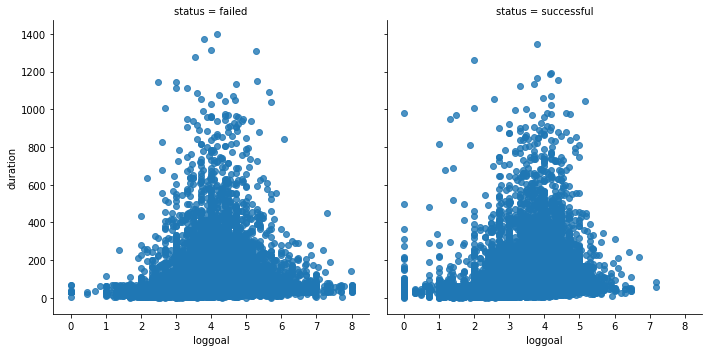

In [105]:
sns.lmplot(x = 'loggoal', y = 'duration', col ='status', data = df, fit_reg = False)

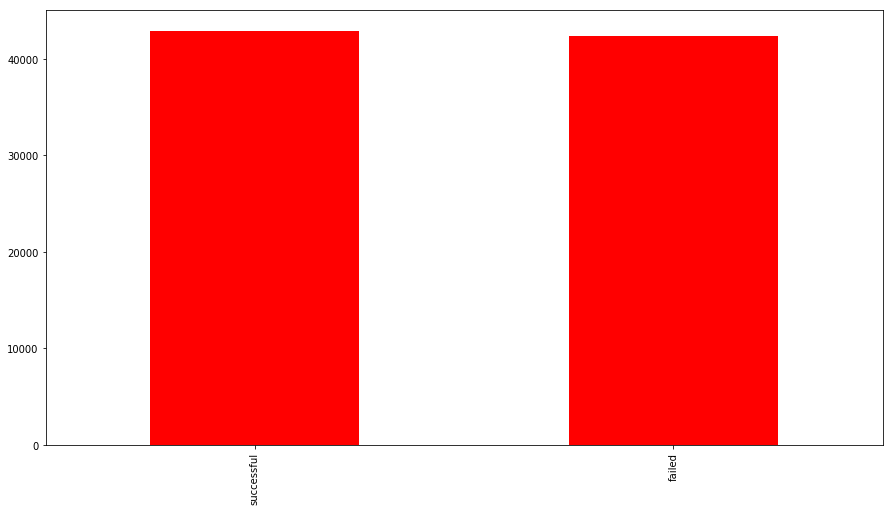

In [8]:
df.status.value_counts().plot('bar', figsize =(15,8),color = 'r')

In [ ]:
df.g

In [21]:
df.country.value_counts()

US    57503
GB     9927
CA     4353
AU     2294
DE     1771
FR     1354
IT     1189
MX     1030
ES      952
NL      886
SE      782
DK      504
NZ      430
HK      337
IE      333
CH      328
BE      314
NO      289
SG      277
AT      245
JP      107
LU       28
Name: country, dtype: int64

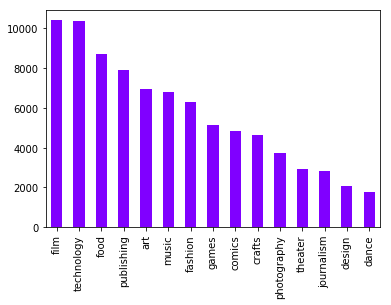

In [12]:
df.category.value_counts().plot(kind ='bar' , cmap = 'rainbow')

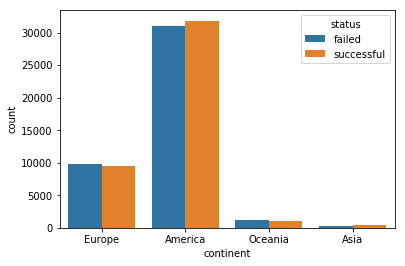

In [20]:
sns.countplot(x ='continent', data =df, hue ='status')